# 2CSSID-TP09. Apprentissage par renforcement

In [ ]:
import matplotlib
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline

np.__version__, pd.__version__, matplotlib.__version__

('1.21.1', '1.3.0', '3.4.2')

In [ ]:
from typing import Tuple, List, Type, Dict, Set

## I. Réalisation des algorithmes

Dans cette partie, on va implémenter un algorithme d'apprentissage par renforcement.
Deux classes seront implémentées : l'agent et l'environnement. 

### I.1. Agent

Ici, on commence par réaliser les fonctions de l'agent.

#### I.1.1. Création de la table Q

Etant donné $n$ états et $m$ actions, on crée une matrice $Q[n, m]$ initialisée à $0$.

In [ ]:
# TODO: Réaliser la fonction de création de la table Q
def creer_Q(nbr_etats: int, nbr_actions: int) -> np.ndarray:
    return np.zeros((nbr_etats, nbr_actions))
2
#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# array([[0., 0., 0.],
#        [0., 0., 0.],
#        [0., 0., 0.],
#        [0., 0., 0.],
#        [0., 0., 0.]])
#---------------------------------------------------------------------

Q5_3 = creer_Q(5, 3)

Q5_3

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

#### I.1.2. Exploration et Exploration de la table Q

Dans les deux fonctions, on choisit un entier entre $0$ et $m$ (nombre des actions).
Dans l'exploration, on choisit ce nombre aléatoirement. 
Dans l'exploitation, on choisit l'action qui a une valeur max parmi celles de l'état courant.

In [ ]:
# TODO: Réaliser la fonction d'exploration
def exploration(Q: np.ndarray) -> int:
    return random.randint(0, Q.shape[1] - 1)

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# un nombre aléatoire dans {0, 1, 2}
#---------------------------------------------------------------------

exploration(Q5_3)

0

In [ ]:
# TODO: Réaliser la fonction d'exploitation
def exploitation(Q: np.ndarray, etat: int) -> int:
    return np.argmax(Q[etat,:])

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# (2, 0, 1, 2, 1)
#---------------------------------------------------------------------

Q_t = np.array([
    [0.1, 0.2, 0.3],
    [1.0, 0.5, 0.7],
    [0.5, 1.0, 0.8],
    [0.2, 0.8, 0.9],
    [0.2, 1.0, 0.3]
])

exploitation(Q_t, 0), exploitation(Q_t, 1), exploitation(Q_t, 2), exploitation(Q_t, 3), exploitation(Q_t, 4)

(2, 0, 1, 2, 1)

In [ ]:
def choisir_action(Q: np.ndarray, etat: int, epsilon: float=0.2) -> int:
    if np.random.random() < epsilon:
        return exploration(Q)
    else:
        return exploitation(Q, etat)

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# Soit 2 soit un autre nombre dans {0, 1, 2}
#---------------------------------------------------------------------

choisir_action(Q_t, 0)

2

#### I.1.3. Mise à jours de la table Q

$$
Q(s_t, a_t) = Q(s_t, a_t) + \alpha * (r + \gamma * \max_a Q(s_{t+1}, a) - Q(s_t, a_t))
$$

In [ ]:
# TODO: Réaliser la fonction de mise à jours de la table Q
def mettre_ajour_Q(Q: np.ndarray, etat: int, netat: int, action: int, alpha: float, r: float, gamma: float) -> np.ndarray:
    new_Q = Q.copy()
    new_Q[etat, action] = new_Q[etat, action] + alpha * (r + gamma * new_Q[netat, exploitation(new_Q, netat)] - new_Q[etat, action])
    return new_Q

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# array([[0.1 , 0.2 , 0.3 ],
#        [1.  , 0.5 , 1.58],
#        [0.5 , 1.  , 0.8 ],
#        [0.2 , 0.8 , 0.9 ],
#        [0.2 , 1.  , 0.3 ]])
#---------------------------------------------------------------------

mettre_ajour_Q(Q_t, 1, 2, 2, 0.2, 5, 0.1)

array([[0.1 , 0.2 , 0.3 ],
       [1.  , 0.5 , 1.58],
       [0.5 , 1.  , 0.8 ],
       [0.2 , 0.8 , 0.9 ],
       [0.2 , 1.  , 0.3 ]])

#### I.1.4. La classe Agent

In [ ]:
class Agent:
    def __init__(self, nbr_etats: int, nbr_actions: int, alpha: float, epsilon=0.2):
        self.alpha = alpha
        self.epsilon = epsilon
        self.Q = creer_Q(nbr_etats, nbr_actions)
    
    def set_etat(self, etat: int):
        self.etat = etat
        self.action = 0
        
    def choisir_action(self):
        self.action = choisir_action(self.Q, self.etat, self.epsilon)
        return self.action
    
    def appliquer(self, netat: int, action: int, r: float, gamma: float):
        self.Q = mettre_ajour_Q(self.Q, self.etat, netat, self.action, self.alpha, r, gamma)
        self.etat = netat
        

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# array([[-2.  ,  4.  ,  0.  ],
#        [-0.36, -0.2 , -2.  ],
#        [ 0.  ,  0.  ,  0.  ],
#        [-0.2 ,  0.4 ,  0.  ],
#        [ 2.  ,  0.  ,  0.  ]])
#---------------------------------------------------------------------

netats_rs = [(0, -1), (1, -10), (3, -1), (1, 2), (4, -1), (1, 10), (1, -10), (0, -1), (0, 20)]

agent = Agent(5, 3, 0.2, epsilon=0.) # exploitation: pour qu'il soit déterministe
agent.set_etat(3) # etat initial = 3

for netat, r in netats_rs:
    action = agent.choisir_action()
    # FeedBack de l'environnement (netat, r)
    agent.appliquer(netat, action, r, gamma=0.5)
    

agent.Q

array([[-2.  ,  4.  ,  0.  ],
       [-0.36, -0.2 , -2.  ],
       [ 0.  ,  0.  ,  0.  ],
       [-0.2 ,  0.4 ,  0.  ],
       [ 2.  ,  0.  ,  0.  ]])

### I.2. Environnement

Ici, on va implémenter le problème du taxi et passager : (https://arxiv.org/pdf/cs/9905014.pdf).
Notre environnement est un espace divisé en $nb_l$ lignes et $nb_c$ colonnes pour indiquer la position.
Il contient, aussi, un nombre d'arrêts $b_a$. 
La position du taxi est encodée en utilisant le numéro de la ligne et de lacolonnes (les coordonnées).
La destination est le numéro de l'arrêt ($0<= dst < nb_a$).
La position du passager est représentée par le numéro de l'arrêt ($0 <= psg < nb_a$) plus un numéro $psg = nb_a$ indiquant que le passager est à l'intérieur du taxi.

#### I.2.1. Encodage et décodage des états

**Rien à programmer ici**

Ici, nous avons deux fonctions : une qui encode l'état en se basant sur la position du taxi, le numéro de l'arrêt de démarrage, le numéro de l'arrêt destinataire, le nombre des colonnes, des lignes et des arrêts.
L'autre fonction décode un état en position du taxi : ligne et colonne plus l'arrêt du passager et l'arrêt destinataire. 

In [ ]:
def encoder_etat(pos: Tuple[int, int], psg: int, dst: int, nb_l: int, nb_c: int, nb_a: int) -> int:
    return (pos[0] * nb_c + pos[1]) * (nb_a + 1) * nb_a + (psg * nb_a + dst)

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# 153
#---------------------------------------------------------------------

encoder_etat((1, 2), 3, 1, 5, 5, 4)

153

In [ ]:
def decoder_etat(etat: int, nb_l:int, nb_c: int, nb_a: int) -> Tuple[int, int, int, int]:
    nb_pa = (nb_a + 1) * nb_a # nombre max des positions passager * arret par case
    
    pa = etat % nb_pa # position passager * position arret
    dst = pa % nb_a
    psg = pa// nb_a
    
    lc = etat // nb_pa # ligne * colonne
    l = lc // nb_c
    c = lc % nb_c
    
    return l, c, psg, dst

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# (1, 2, 3, 1)
#---------------------------------------------------------------------

decoder_etat(153, 5, 5, 4)

(1, 2, 3, 1)

#### I.2.2. Calculer la récompense

La fonction de récompense a comme entrée : 

- etat : l'état courant de l'agent
- action : numéro de l'action choisie par l'agent 
- nb_l, nb_c : nombre des lignes et des colonnes dans l'environnement
- arrets : une liste des posittions des arrets. La position est encodée sous forme d'un tuple (x, y). P.S. Les tuples sont hashables ; donc on peut vérifier leur existance dans la liste en utilisant l'opérateur "in".
- bar : un dictionnaire {pos: list entiers}. Si une position existe, on aura une liste des actions interdites (actions de positionnement).

La fonction doit retourner : la récompense, l'état suivant et un booléan qui indique la fin.

**La récompense**

- Pour chaque action exécutée, une récompense de -1 est attribuée
- Si l'agent essaye de déposer ou prendre un passager illégalement, une récompense de -10 est attribuée en plus. L'action "déposer" est considérée illégale si le passager n'est pas dans le taxi ou si le lieu de dépot n'est pas l'arrêt destinataire. L'action "prendre" est considérée illégale si le passager n'est pas dans la position actuelle ou il est déjà dans la voiture.
- Si l'agent dépose le passager dans l'arrêt destinaire, il aura une récompense de +20 en plus.

**L'état suivant**

- L'état suivant est celui actuel sauf dans les cas suivants
- Si on prend un passager avec succès, l'index du passager sera "nb_a" (dans la voiture). 
- Si on dépose un passer avec succès, l'index du passager sera "dst". La fin sera True.
- Dans le cas d'une action de postionnement ({0, 1, 2, 3}), si la position n'est pas dans celles du barrière "bar" ou elle existe mais l'action n'existe pas dans la liste des actions interdites, on calcule la nouvelle position et le nouveau état.

In [ ]:
# En se basant sur l'action et la position, retourner la nouvelle position.
# Cette fonction ne prend pas en considération les contraintes 
def repositionner(pos: Tuple[int, int], action: int) -> Tuple[int, int]:  
    if action == 0: # gauche
        return pos[0], pos[1]  - 1
    if action == 1: # droit
        return pos[0], pos[1]  + 1
    if action == 2: # avant 
        return pos[0] + 1, pos[1]
    if action == 3: # arrière
        return pos[0] - 1, pos[1]
    
    return pos # action > 3

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# ((2, 2), (1, 2), (1, 1))
#---------------------------------------------------------------------

repositionner((1, 2), 2), repositionner((1, 2), 4), repositionner((1, 2), 0)

((2, 2), (1, 2), (1, 1))

In [ ]:
# TODO: Compléter la fonction qui calcule la récompense
def calculer_recompense(etat: int, action: int, 
                        nb_l:int, nb_c: int, 
                        arrets: List[Tuple[int, int]],
                        bar: Dict[Tuple[int, int], Set[int]]) -> Tuple[float, int, bool]:
    
    recompense = -1 # Toujours on applique cette récompense
    netat = etat
    fin = False
    nb_a = len(arrets)
    l, c, psg, dst = decoder_etat(etat, nb_l, nb_c, nb_a)
    pos = (l, c)

    # Compléter ici
    # dépose
    if(action == 5):
        if(psg != nb_a):
            recompense -= 10
        else:
            if(not(pos in arrets)):
                recompense -= 10
            else:
                if(pos != arrets[dst]):
                    recompense -= 10
                else:
                    # successful drop
                    psg = dst
                    netat = encoder_etat(pos, psg, dst, nb_l, nb_c, nb_a)
                    recompense += 20
                    fin = True 
            
    # prendre 
    if(action == 4):
        #print(pos == arrets[psg])
        if(psg == nb_a):
            recompense -= 10
        else:
            if(pos not in arrets):
                recompense -= 10
            else:
                if(pos != arrets[psg]):
                    recompense -= 10
                else:
                    psg = nb_a
                    netat = encoder_etat(pos, psg, dst, nb_l, nb_c, nb_a)

    # valid move
    if((pos not in bar) or ((pos in bar) and (action not in bar[pos]))):
        pos = repositionner(pos, action)
        netat = encoder_etat(pos, psg, dst, nb_l, nb_c, nb_a)

    
    return recompense, netat, fin

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# [(-11, 56, False),
#  (-11, 44, False),
#  (-1, 96, False),
#  (19, 0, True),
#  (-11, 4, False),
#  (-11, 56, False),
#  (-11, 44, False),
#  (-1, 44, False),
#  (-1, 284, False),
#  (-1, 224, False)]
#---------------------------------------------------------------------

nb_l, nb_c = 5, 5
arrets = [(0,0), (0,4), (4,0), (4,3)]
nb_a = len(arrets)
barrieres = {
    (0, 1): set([1]), # barrière à droit
    (0, 2): set([0]), # barrière à gauche
    (3, 0): set([1]), # barrière à droit
    (4, 0): set([1]), # barrière à droit
    (3, 1): set([0]), # barrière à gauche
    (4, 1): set([0]), # barrière à gauche
    (3, 2): set([1]), # barrière à droit
    (4, 2): set([1]), # barrière à droit
    (3, 3): set([0]), # barrière à gauche
    (4, 3): set([0]), # barrière à gauche
}

resultats = []

tests = [# (etat, action)
    # action = 4 (prendre un passager)
    (encoder_etat((0, 2), 4, 0, nb_l, nb_c, nb_a), 4), # pos=(0,2); psg=dans la voiture; dst=arrêt0(0, 0)
    (encoder_etat((0, 2), 1, 0, nb_l, nb_c, nb_a), 4), # pos=(0,2); psg=arrêt1; dst=arrêt0(0, 0)
    (encoder_etat((0, 4), 1, 0, nb_l, nb_c, nb_a), 4), # pos=arrêt1; psg=arrêt1; dst=arrêt0(0, 0)
    # action = 5 (déposer un passager)
    (encoder_etat((0, 0), 4, 0, nb_l, nb_c, nb_a), 5), # pos=arrêt0; psg=dans la voiture; dst=arrêt0(0, 0)
    (encoder_etat((0, 0), 1, 0, nb_l, nb_c, nb_a), 5), # pos=arrêt0; psg=arrêt1; dst=arrêt0(0, 0)
    (encoder_etat((0, 2), 4, 0, nb_l, nb_c, nb_a), 5), # pos=(0, 2); psg=dans la voiture; dst=arrêt0(0, 0)
    (encoder_etat((0, 2), 1, 0, nb_l, nb_c, nb_a), 5), # pos=(0, 2); psg=arrêt1; dst=arrêt0(0, 0)
    # action = 0 (aller à gauche)
    (encoder_etat((0, 2), 1, 0, nb_l, nb_c, nb_a), 0), # il existe une barrière à gauche
    (encoder_etat((3, 0), 1, 0, nb_l, nb_c, nb_a), 0), # il existe une barrière à droite
    (encoder_etat((2, 2), 1, 0, nb_l, nb_c, nb_a), 0), # il n'existe aucune barrière
]

for etat, action in tests:
    resultats.append(calculer_recompense(etat, action, nb_l, nb_c, arrets, barrieres))

resultats

[(-11, 56, False),
 (-11, 44, False),
 (-1, 96, False),
 (19, 0, True),
 (-11, 4, False),
 (-11, 56, False),
 (-11, 44, False),
 (-1, 44, False),
 (-1, 284, False),
 (-1, 224, False)]

#### I.2.3. La classe Envinonnement

In [ ]:
import time, sys
from IPython.display import HTML, display, clear_output

class TaxiEnv():
    def __init__(self, nb_l:int, nb_c: int, 
                 arrets: List[Tuple[int, int]], 
                 bar: Dict[Tuple[int, int], Set[int]], gamma: float = 0.5):
        self.actions = ['gauche', 'droit', 'avant', 'arriere', 'prendre', 'deposer']
        self.arrets = arrets
        self.nb_l = nb_l
        self.nb_c = nb_c
        self.nb_etats = nb_l * nb_c * (len(arrets) + 1) * len(arrets)
        self.bar = bar
        self.gamma = gamma
        
        for i in range(nb_l):
            pos = (i, 0)
            if pos not in bar:
                bar[pos] = set()
            bar[pos].add(0) # on ne peut pas aller à gauche
            pos = (i, nb_c-1)
            if pos not in bar:
                bar[pos] = set()
            bar[pos].add(1) # on ne peut pas aller à droit
        for j in range(nb_c):
            pos = (0, j)
            if pos not in bar:
                bar[pos] = set()
            bar[pos].add(3) # on ne peut pas aller en avant
            pos = (nb_l-1, j)
            if pos not in bar:
                bar[pos] = set()
            bar[pos].add(2) # on ne peut pas aller en arrière
            
        
    def ajouter_agent(self, alpha: float, epsilon=0.2):
        self.agent = Agent(self.nb_etats, len(self.actions), alpha, epsilon=epsilon)
    
    def encoder_etat(self, pos: Tuple[int, int], psg: int, dst: int):
        return encoder_etat(pos, psg, dst, self.nb_l, self.nb_c, len(self.arrets))
    
    def decoder_etat(self, etat: int) -> Tuple[int, int, int]:
        return decoder_etat(etat, self.nb_l, self.nb_c, len(self.arrets))
    
    def initialiser(self, pos: Tuple[int, int], psg: int, dst: int):
        etat = self.encoder_etat(pos, psg, dst)
        self.agent.set_etat(etat)
    
    def transporter(self, plot=False):
        
        nb_l = self.nb_l
        nb_c = self.nb_c
        arrets = self.arrets
        bar = self.bar
        nb_a = len(arrets)
        actions = self.actions
        
        etat = self.agent.etat
        
        etapes = []
        fin = False
        rt = 0
        
        while not fin:
            action = self.agent.choisir_action()
            r, netat, fin = calculer_recompense(etat, action, nb_l, nb_c, arrets, bar)
            etapes.append((self.decoder_etat(etat), actions[action], r, fin))
            self.agent.appliquer(netat, action, r, self.gamma)
            if plot:
                rt += r
                html = self.dessiner()
                html += '<div class="cont">'
                html += f'<p>Etape: {len(etapes)}</p>'
                html += f'<p>Etat: {etat}</p>'
                html += f'<p>Action: {actions[action]}</p>'
                html += f'<p>Récompense: {r}</p>'
                html += f'<p>Récompense totale: {rt}</p>'
                html += '</div>'
                time.sleep(0.5)
                clear_output(wait=True)
                display(HTML(html))
                sys.stdout.flush()
            etat = netat
 
        return etapes
    
    def dessiner(self):
        bordures = ['l', 'r', 'b', 't']
        
        nb_a = len(self.arrets)
        
        if hasattr(self.agent, 'etat'):
            l, c, psg, dst = decoder_etat(self.agent.etat, self.nb_l, self.nb_c, nb_a)
        else:
            l, c, psg, dst = None, None, None, None
        
        html = """<style>
                div.cont {display:inline-block; margin:5px; vertical-align: top;}
                table#t, table#t td, table#t tr {border: 1px dotted black; 
                                                background: white; padding: 1px;}
                
                table#t td {width: 1cm; height:1cm; text-align: center;}
                table#t tr td.l {border-left: 2px solid red ;}
                table#t tr td.r {border-right: 2px solid red ;}
                table#t tr td.b {border-bottom: 2px solid red ;}
                table#t tr td.t {border-top: 2px solid red ;}
                table#t tr td.arret {background: yellow;}
                </style>
                <div class="cont">
                <table id="t">
                """
        for i in range(self.nb_l):
            html += "<tr>"
            for j in range(self.nb_c):
                cls = None
                html += "<td "
                if (i, j) in self.bar:
                    cls = 'class="'
                    bl = self.bar[(i, j)]
                    for b in bl:
                        cls += bordures[b] + ' '
                if (i, j) in self.arrets:
                    if not cls:
                        cls = 'class="'
                    cls += 'arret'
                if cls:
                    cls += '"'
                    html += cls
                html += '>'
                cont = ''
                if dst != None and self.arrets[dst] == (i, j):
                    cont = '🏲'
                if psg != None and psg != nb_a and self.arrets[psg] == (i, j):
                    cont += '👽'
                if (l, c) == (i, j):
                    if psg != None and psg != nb_a:
                        cont += '🚖'
                    else:
                        cont += '🚍'
                if not cont:
                    cont = ':'
                html += cont + '</td>'
            html += '</tr>'
            
        html += '</table></div>'
        
        return html
        
print('FIN')

FIN


In [ ]:
arrets = [(0,0), (0,4), (4,0), (4,3)]
barrieres = {
    (0, 1): set([1]), # barrière à droit
    (0, 2): set([0]), # barrière à gauche
    (3, 0): set([1]), # barrière à droit
    (4, 0): set([1]), # barrière à droit
    (3, 1): set([0]), # barrière à gauche
    (4, 1): set([0]), # barrière à gauche
    (3, 2): set([1]), # barrière à droit
    (4, 2): set([1]), # barrière à droit
    (3, 3): set([0]), # barrière à gauche
    (4, 3): set([0]), # barrière à gauche
}

taxi = TaxiEnv(5, 5, arrets, barrieres)
taxi.ajouter_agent(0.1, 0.1)
taxi.initialiser((3, 1), 2, 0)


html = taxi.dessiner()
display(HTML(html))
hist = taxi.transporter(plot=True) 

🏲👽🚖,:,:,:,:
:,:,:,:,:
:,:,:,:,:
:,:,:,:,:
:,:,:,:,:


In [ ]:
# Tester après l'exécution de la même initialisation plusieurs fois
for i in range(1000):
    taxi.initialiser((3, 1), 2, 0)
    taxi.transporter() 

taxi.initialiser((3, 1), 2, 0)
hist = taxi.transporter(plot=True)

🏲👽🚖,:,:,:,:
:,:,:,:,:
:,:,:,:,:
:,:,:,:,:
:,:,:,:,:


In [ ]:
# historique des étapes
hist

[((3, 1, 2, 0), 'arriere', -1, False),
 ((2, 1, 2, 0), 'gauche', -1, False),
 ((2, 0, 2, 0), 'avant', -1, False),
 ((3, 0, 2, 0), 'avant', -1, False),
 ((4, 0, 2, 0), 'prendre', -1, False),
 ((4, 0, 4, 0), 'droit', -1, False),
 ((4, 0, 4, 0), 'arriere', -1, False),
 ((3, 0, 4, 0), 'arriere', -1, False),
 ((2, 0, 4, 0), 'arriere', -1, False),
 ((1, 0, 4, 0), 'arriere', -1, False),
 ((0, 0, 4, 0), 'deposer', 19, True)]

In [ ]:
# tester l'appentissage avec des initialisations aléatoires
arrets2 = [(0,0), (0,4), (4,0), (4,3)]
barrieres2 = {
    (0, 1): set([1]), # barrière à droit
    (0, 2): set([0]), # barrière à gauche
    (3, 0): set([1]), # barrière à droit
    (4, 0): set([1]), # barrière à droit
    (3, 1): set([0]), # barrière à gauche
    (4, 1): set([0]), # barrière à gauche
    (3, 2): set([1]), # barrière à droit
    (4, 2): set([1]), # barrière à droit
    (3, 3): set([0]), # barrière à gauche
    (4, 3): set([0]), # barrière à gauche
}

taxi2 = TaxiEnv(5, 5, arrets2, barrieres2)
taxi2.ajouter_agent(0.1, 0.1)

def exec_aleatoire(taxi_env, plot=False):
    pos = np.random.randint(5), np.random.randint(5)
    psg, dst = np.random.randint(len(arrets2)), np.random.randint(len(arrets2))
    taxi_env.initialiser(pos, psg, dst)
    return taxi_env.transporter(plot=plot) 

for i in range(10000):
    exec_aleatoire(taxi2, plot=False)
    
print('fin')

fin


In [ ]:
hist = exec_aleatoire(taxi2, plot=True)

:,:,:,:,🏲👽🚖
:,:,:,:,:
:,:,:,:,:
:,:,:,:,:
:,:,:,:,:


## II. Application et analyse

Voici quelques outils pour tester l'apprentissage par renforcement :

- OpenAI Baselines: https://github.com/openai/baselines
- Intel Coach: https://github.com/IntelLabs/coach
- Stable Baselines: https://github.com/DLR-RM/stable-baselines3
- TF-Agents: https://github.com/tensorflow/agents
- Keras-RL: https://github.com/keras-rl/keras-rl
- Tensorforce: https://github.com/tensorforce/tensorforce
- Chainer RL: https://github.com/chainer/chainerrl
- Mushroom RL: https://github.com/MushroomRL/mushroom-rl
- Acme: https://github.com/deepmind/acme
- Dopamine: https://github.com/google/dopamine
- RAY: https://github.com/ray-project/ray

Environnements :

- Gym: https://gym.openai.com/
- iGibson: http://svl.stanford.edu/igibson/

On va utiliser "MushroomRL" puisque l'outil implémente les méthodes traditionnelles.
Aussi, on va utiliser "Gym" pour générer les environnements. 
L'environnement Taxi sera utilisé puisqu'il ne consomme pas beacoup de ressources (mémoire et calcul).
Vous pouvez consulter "Gym" pour des environements plus complexes comme les jeux.

In [ ]:
# installation des packages
# import sys
# !{sys.executable} -m pip install gym
# !{sys.executable} -m pip install mushroom_rl

### II.1. Exploration vs. Exploitation

Ici, on veut tester l'effet de l'exploration/exploitation. 
Pour ce faire, on va tester avec des valeurs différentes de epsilon :

- 0: exploitation (toujours)
- 0.5: exploitation (50%) et exploration (50%)
- 0.9: exploration (90%) et exploitation (10%).

Le nombre max, par défaut, des étapes est fixé à 200.

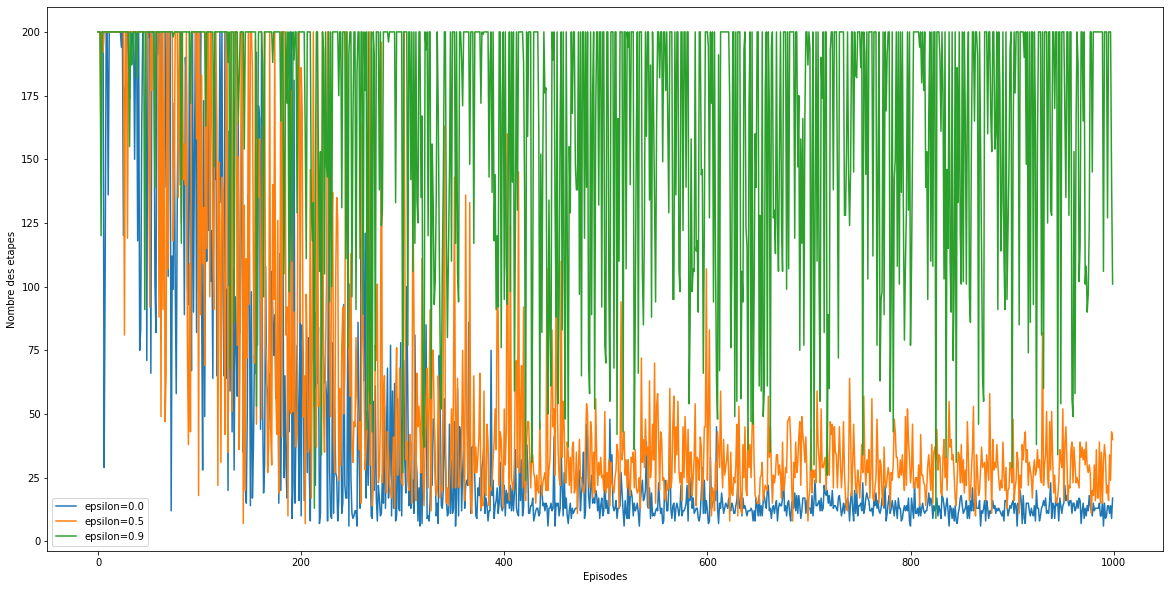

In [ ]:
from mushroom_rl.core import Environment
from mushroom_rl.policy import EpsGreedy
from mushroom_rl.algorithms.value import QLearning
from mushroom_rl.utils.dataset import compute_J
from mushroom_rl.utils.parameters import Parameter
from mushroom_rl.core import Core
from mushroom_rl.utils.callbacks import CollectDataset
from mushroom_rl.utils.callbacks.callback import Callback
from mushroom_rl.utils.dataset import parse_dataset, episodes_length

NBR_EPISODES = 1000 # nombre des exécutions

env = Environment.make('Gym', 'Taxi-v3')

epsilons = [.0, .5, .9]

tests = []

for eps in epsilons:
    epsilon = Parameter(value=eps)
    pi = EpsGreedy(epsilon=epsilon)
    agent = QLearning(env.info, pi, learning_rate=Parameter(value=.3))
    
    collect_dataset = CollectDataset()
    callbacks = [collect_dataset]
    
    core = Core(agent, env, callbacks_fit=callbacks)
    core.learn(n_episodes=NBR_EPISODES, n_steps_per_fit=1)
    
    res = {}
    res['nbr_etapes'] = episodes_length(collect_dataset.get())
    tests.append(res)
    

plt.figure(figsize=(20,10))
for i, test in enumerate(tests):
    plt.plot(test['nbr_etapes'], label='epsilon=' + str(epsilons[i]))
plt.xlabel('Episodes') 
plt.ylabel('Nombre des etapes') 
plt.legend()
plt.show()


**TODO: Analyser les résultats** 

- Pourquoi l'algorithme avec plus d'exploration ne peut pas minimiser le nombre des étapes après plusieurs épisodes ?
- Pourquoi il existe des épisodes qui ont un nombre minimal des étapes surtout dans les dernières épisodes (toujours dans l'algorithme avec plus d'exploration) ?
- Pourquoi celui avec seulement l'exploitation prend moins d'étapes à chaque épisode ?
- Dans ce cas, quel  est l'interêt de l'exploration ?

**Réponse**

- Parceque l'exploration choisir une action aléatoire afin de maximiser la connaissance actuelle , ce qui ralenti l'apprentissage
- l'exploitation prend moins d'étapes à chaque episode car l'agent choisir l'action la plus optimal , et avec le mis-à-jour de la table Q , le nombre d'étape commence à diminuer par episode 
- l'interet de l'éxploration est de mener l'agent à des rewards optimaux

### II.2. Taux d'apprentissage

Ici, on veut tester l'effet du ttaux d'apprentissage sur le nombre des itérations. 


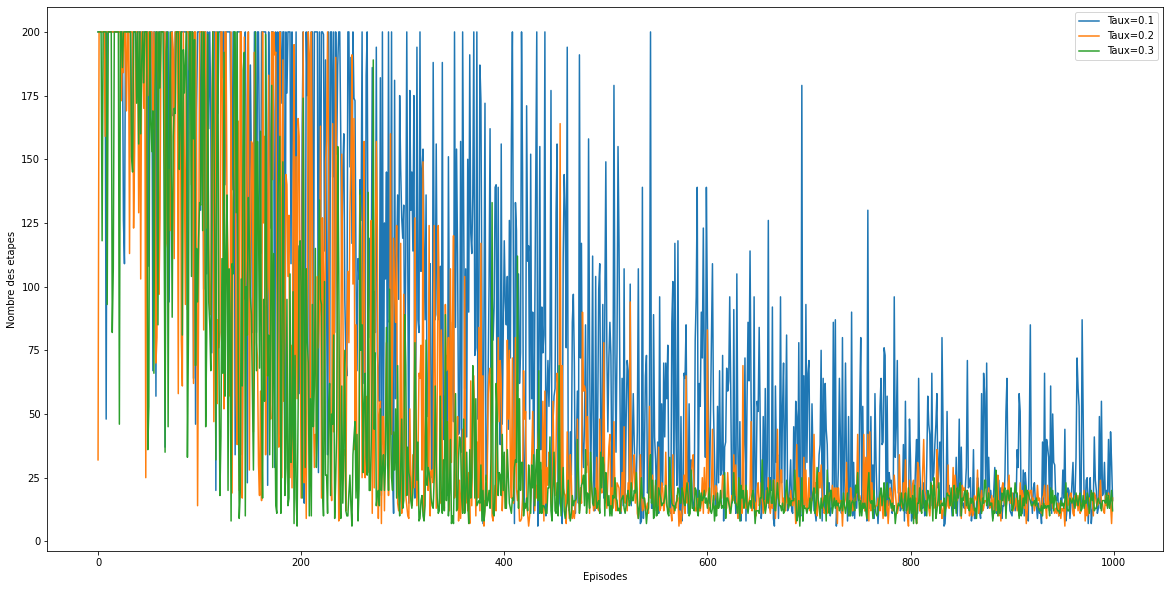

In [ ]:
NBR_EPISODES = 1000 # nombre des exécutions

env = Environment.make('Gym', 'Taxi-v3')

lrs = [.1, .2, .3]

tests = []

for lr in lrs:
    epsilon = Parameter(value=0.1)
    pi = EpsGreedy(epsilon=epsilon)
    agent = QLearning(env.info, pi, learning_rate=Parameter(value=lr))
    
    collect_dataset = CollectDataset()
    callbacks = [collect_dataset]
    
    core = Core(agent, env, callbacks_fit=callbacks)
    core.learn(n_episodes=NBR_EPISODES, n_steps_per_fit=1)
    
    res = {}
    res['nbr_etapes'] = episodes_length(collect_dataset.get())
    tests.append(res)
    

plt.figure(figsize=(20,10))
for i, test in enumerate(tests):
    plt.plot(test['nbr_etapes'], label='Taux=' + str(lrs[i]))
plt.xlabel('Episodes') 
plt.ylabel('Nombre des etapes') 
plt.legend()
plt.show()

**TODO: Analyser les résultats** 

- Quel est l'effet de $\alpha$ sur le nombre des étapes après chaque $n$ épisodes ?
- En consultant ce diagramme et celui avant, on peut dire que l'évolution avec $\epsilon=0$ est presque comme celle avec $\alpha=0.3$ et l'évolution avec $\epsilon=0.5$ est presque comme celle avec $\alpha=0.1$. Dans ce cas, est ce qu'on peut dire qu'il est une relation directe entre les deux paramètres (on peut remplacer un avec une fonction sur l'autre) ? Pourquoi ?

**Réponse**

- le nombre d'étapes diminue avec l'augmentation de $\alpha$
- Non il ya pas une relation directe entre les deux paramètres , car epsilon determine la policy (exploration ou bien exploitation) et alpha determine la vitesse du mise-à-jour de la matrice Q (taux d'apprentissage)